## TOC:
   1. [Load the Modules](#first-bullet)
   2. [Load, Examine and Explore the Data](#second-bullet)
   3. [Plotting some Example](#second2-bullet)
   4. [Creating model](#4-bullet)
   5. [Training the model](#5-bullet)
   6. [Visualizing Loss and Accuracy](#6-bullet)
   7. [Predictings Image](#7-bullet)

# 1. Load the Modules <a class="anchor" id="first-bullet"></a>

In [19]:
import PIL
import pathlib
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.__version__

'2.9.1'

In [20]:
batch_size = 32
img_height = 128
img_width = 128

# 2. Load the Data, Examine and Explore <a class="anchor" id="second-bullet"></a>

In [21]:
dataset_path = "/datasets/utk-face/utk-face/"
data_dir = pathlib.Path(dataset_path)
image_count = len(list(data_dir.glob('male/*')) + list(data_dir.glob('female/*')))
print(image_count)

23708


/datasets/utk-face/utk-face/male/100_0_0_20170112213500903.jpg.chip.jpg


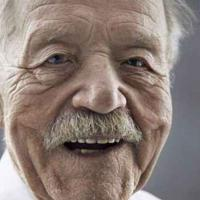

In [22]:
faces = list(data_dir.glob('male/*')) + list(data_dir.glob('female/*'))
print(faces[0])
PIL.Image.open(str(faces[0]))

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=9988,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 23708 files belonging to 2 classes.
Using 18967 files for training.


In [24]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=9988,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 23708 files belonging to 2 classes.
Using 4741 files for validation.


# 3. Plotting some Examples <a class="anchor" id="second1-bullet"></a>

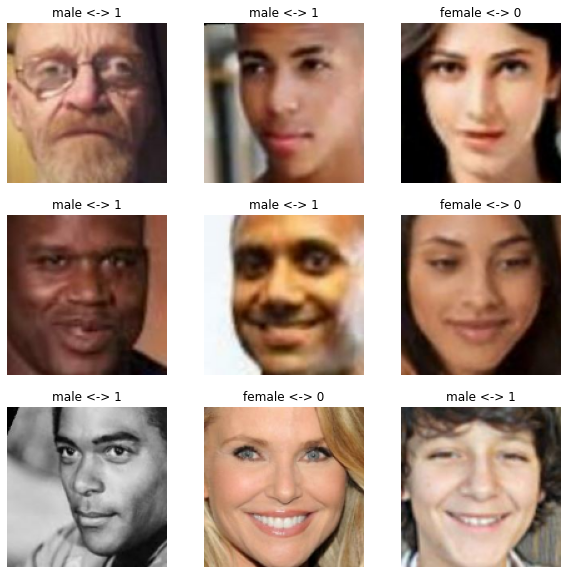

In [25]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]] + ' <-> ' + str(int(labels[i])))
        plt.axis("off")

In [26]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [27]:
# Data Augmentation
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

# 4. Creating model <a class="anchor" id="4-bullet"></a>
Here we're using Convolutional Neural Network (CNN)

In [28]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  data_augmentation,
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 5. Training the model <a class="anchor" id="5-bullet"></a>

In [30]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50
593/593 [==============================] - 23s 37ms/step - loss: 0.7079 - accuracy: 0.5229 - val_loss: 0.6926 - val_accuracy: 0.5185
Epoch 2/50
593/593 [==============================] - 22s 37ms/step - loss: 0.6922 - accuracy: 0.5256 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 3/50
593/593 [==============================] - 28s 48ms/step - loss: 0.6923 - accuracy: 0.5237 - val_loss: 0.6925 - val_accuracy: 0.5185
Epoch 4/50
593/593 [==============================] - 27s 45ms/step - loss: 0.6704 - accuracy: 0.5745 - val_loss: 0.5655 - val_accuracy: 0.7163
Epoch 5/50
593/593 [==============================] - 26s 44ms/step - loss: 0.5236 - accuracy: 0.7405 - val_loss: 0.4787 - val_accuracy: 0.7692
Epoch 6/50
593/593 [==============================] - 22s 37ms/step - loss: 0.4607 - accuracy: 0.7826 - val_loss: 0.4125 - val_accuracy: 0.8184
Epoch 7/50
593/593 [==============================] - 27s 45ms/step - loss: 0.4273 - accuracy: 0.7974 - val_loss: 0.4181 - val_accuracy:

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 128)       73856     
                                                      

# 6. Visualizing Loss and Accuracy <a class="anchor" id="6-bullet"></a>

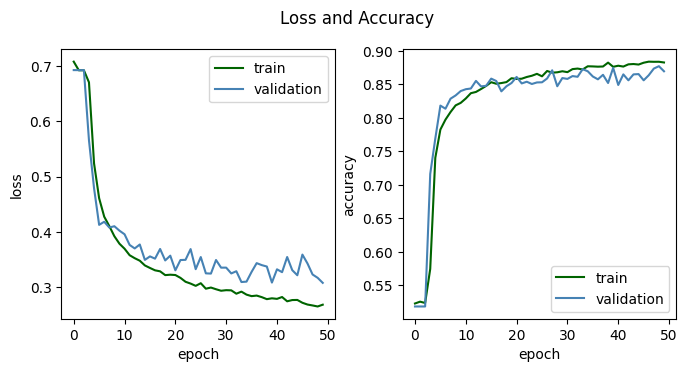

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100)
fig.suptitle('Loss and Accuracy')
fig.tight_layout()
fig.set_size_inches(7, 3.5, forward=True)

ax1.plot(history.history['loss'], color="darkgreen")
ax1.plot(history.history['val_loss'], color="steelblue")
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend(['train', 'validation'], loc='upper right')

ax2.plot(history.history['accuracy'], color="darkgreen")
ax2.plot(history.history['val_accuracy'], color="steelblue")
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend(['train', 'validation'], loc='lower right')

# 7. Predicting Images <a class="anchor" id="7-bullet"></a>

(32, 128, 128, 3)


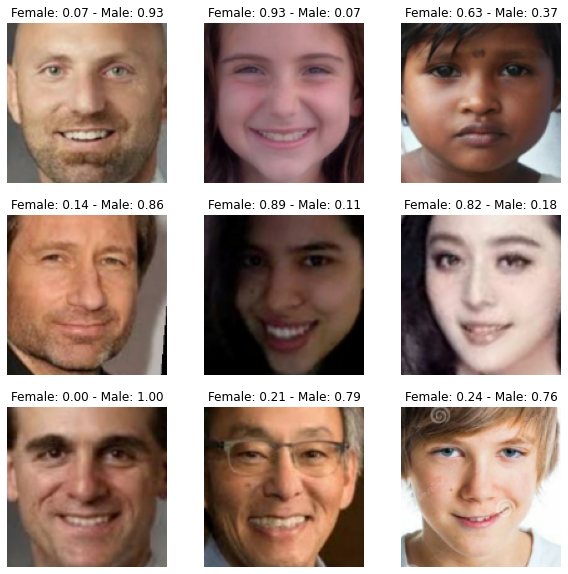

In [36]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    print(images.shape)
    for i in range(9):
        img = images[i].numpy().astype("uint8")
        pred = model.predict(
            img.reshape(1, img_height, img_width, 3),
            verbose=0
        )[0]
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Female: {:.2f} - Male: {:.2f}'.format(1 - pred[0], pred[0]))
        plt.axis("off")